In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [5]:
print('Training images: {}'.format(x_train.shape))
print('Testing images: {}'.format(x_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [6]:
print(x_train[0].shape)

(32, 32, 3)


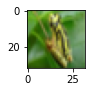

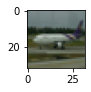

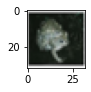

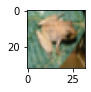

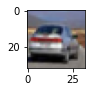

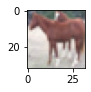

In [7]:
for i in range(232, 238):
  plt.subplot(120+1+i )
  img = x_train[i]
  plt.imshow(img)
  plt.show()

In [9]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding (50000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_train, y_train, batch_size = 28, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1786/1786 [==============================] - 648s 362ms/step - loss: 1.4552 - accuracy: 0.4722 - val_loss: 1.1812 - val_accuracy: 0.5808
Epoch 2/10
1786/1786 [==============================] - 653s 365ms/step - loss: 1.0671 - accuracy: 0.6252 - val_loss: 0.9193 - val_accuracy: 0.6778
Epoch 3/10
1786/1786 [==============================] - 656s 367ms/step - loss: 0.9189 - accuracy: 0.6797 - val_loss: 0.8035 - val_accuracy: 0.7230
Epoch 4/10
1786/1786 [==============================] - 656s 367ms/step - loss: 0.8320 - accuracy: 0.7081 - val_loss: 0.8125 - val_accuracy: 0.7223
Epoch 5/10
1786/1786 [==============================] - 665s 372ms/step - loss: 0.7638 - accuracy: 0.7329 - val_loss: 0.7423 - val_accuracy: 0.7416
Epoch 6/10
1786/1786 [==============================] - 660s 370ms/step - loss: 0.7071 - accuracy: 0.7520 - val_loss: 0.7270 - val_accuracy: 0.7527
Epoch 7/10
1786/1786 [==============================] - 666s 373ms/step - loss: 0.6691 - accuracy: 0.7668 - val_

In [25]:
classes = range(0, 10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes, names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)
predictions = model.predict(batch, verbose =1)

1/1 [==============================] - 0s 48ms/step


In [26]:
print(predictions)

[[2.1448915e-03 1.8903408e-04 9.1758117e-02 2.7528439e-02 4.2855367e-01
  9.4915643e-02 1.0059785e-02 3.4128314e-01 2.2815315e-03 1.2857284e-03]
 [1.5591065e-02 4.3765889e-03 1.3544190e-01 1.1308883e-01 2.3389293e-01
  1.2408269e-01 6.4548239e-02 2.6773793e-01 9.2785638e-03 3.1961232e-02]
 [5.4463507e-03 4.1876505e-03 2.2637111e-01 4.4964634e-02 2.3924734e-02
  6.4728774e-02 5.8418113e-01 3.1605538e-02 1.2211428e-02 2.3786062e-03]
 [1.5358371e-04 1.5081486e-05 2.3197681e-03 8.7212938e-01 4.0263213e-02
  1.3855093e-02 7.0465386e-02 2.6443665e-04 4.8281239e-05 4.8574861e-04]
 [7.3161582e-06 9.9385625e-01 3.3689404e-10 1.5770321e-09 1.6077657e-12
  3.8175024e-10 1.3690506e-11 1.9444499e-09 1.8742544e-04 5.9489571e-03]
 [5.5960840e-08 9.9970490e-01 2.0193915e-10 3.8498920e-09 1.2906150e-13
  7.9059426e-10 2.1744059e-10 1.3186546e-11 2.0809413e-05 2.7429333e-04]
 [1.9589286e-02 1.6779603e-02 4.9655776e-02 5.3661251e-01 1.3401925e-02
  1.5434417e-01 1.1087948e-01 1.3783255e-02 6.7785241e-02 

In [27]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
0.99999994
1.0
0.99999994
1.0
1.0
1.0
0.99999994


In [28]:
class_result = np.argmax(predictions, axis = 1)
print(class_result)

[4 7 6 3 1 1 3 6 8]


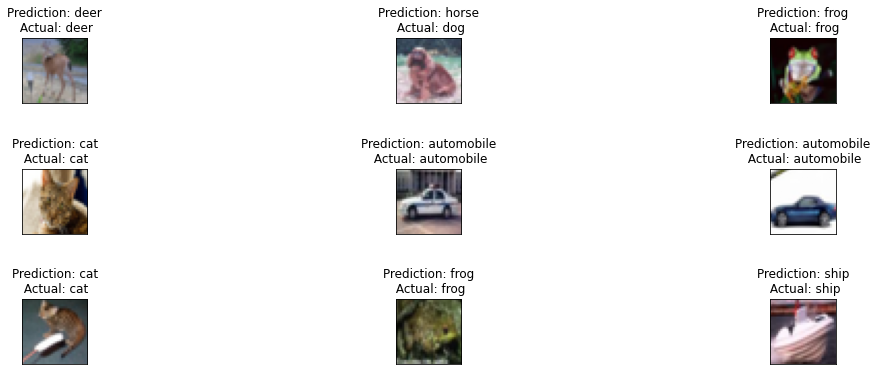

In [34]:
fig, axs = plt.subplots(3,3, figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\n Actual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show()

